####                                                               Report generation on customer data of a Retail Store

In [1]:
# Importing the packages
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
# Assigning the path of the files
filepath = r"C:\Users\Arpita\Desktop\AnalytixLabs_new\Case Studies\Python Case Studies\Retail Case Study - 1"

In [3]:
filepath.replace("\\", "/")

'C:/Users/Arpita/Desktop/AnalytixLabs_new/Case Studies/Python Case Studies/Retail Case Study - 1'

In [4]:
# Reading the datasets
cust = pd.read_csv(filepath + "/Customer.csv")
tran = pd.read_csv(filepath + "/Transactions.csv")
prod = pd.read_csv(filepath + "/prod_cat_info.csv")

In [5]:
cust.nunique()

customer_Id    5647
DOB            4056
Gender            2
city_code        10
dtype: int64

In [6]:
# Looking for duplicates in the data (if any)
tran[tran.duplicated(keep = "first")]

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
3237,63833750229,269016,19-09-2013,10,6,-3,-460,144.900,-1524.900,TeleShop
4513,54818572958,274656,19-07-2013,11,6,-5,-662,347.550,-3657.550,e-Shop
9748,93088859112,272584,4/11/2012,1,2,-1,-1168,122.640,-1290.640,e-Shop
10016,48727689115,270330,21-10-2012,4,3,-4,-1158,486.360,-5118.360,TeleShop
10785,95523406151,273937,16-09-2012,8,3,-5,-483,253.575,-2668.575,e-Shop
11251,42255136382,270202,25-08-2012,12,5,-4,-841,353.220,-3717.220,e-Shop
12967,426787191,273106,28-05-2012,1,2,-5,-109,57.225,-602.225,e-Shop
13713,68625357665,270229,24-04-2012,12,6,-5,-79,41.475,-436.475,Flagship store
13770,84298959416,268663,22-04-2012,3,5,-2,-321,67.410,-709.410,TeleShop
16269,4170892941,266852,21-12-2011,8,3,-1,-412,43.260,-455.260,MBR


In [7]:
# Dropping duplicate records
tran = tran.drop_duplicates()

In [8]:
tran.shape

(23040, 10)

In [9]:
tran.nunique()

transaction_id      20878
cust_id              5506
tran_date            1129
prod_subcat_code       12
prod_cat_code           6
Qty                    10
Rate                 2551
Tax                  4194
total_amt            5764
Store_type              4
dtype: int64

In [10]:
prod.nunique()

prod_cat_code         6
prod_cat              6
prod_sub_cat_code    12
prod_subcat          18
dtype: int64

In [11]:
# Merging customer and transcation data
tran_cust = pd.merge(left = tran, right= cust, how = "left", left_on = "cust_id", right_on = "customer_Id")

In [12]:
tran_cust.columns

Index(['transaction_id', 'cust_id', 'tran_date', 'prod_subcat_code',
       'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type',
       'customer_Id', 'DOB', 'Gender', 'city_code'],
      dtype='object')

In [13]:
# Forming the final dataset
Customer_final = pd.merge(left = tran_cust, right = prod, how = "inner", left_on = ["prod_cat_code","prod_subcat_code"],
                         right_on = ["prod_cat_code","prod_sub_cat_code"])

In [16]:
# Column names and their data types of the final dataset 
Customer_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23040 entries, 0 to 23039
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   transaction_id     23040 non-null  int64  
 1   cust_id            23040 non-null  int64  
 2   tran_date          23040 non-null  object 
 3   prod_subcat_code   23040 non-null  int64  
 4   prod_cat_code      23040 non-null  int64  
 5   Qty                23040 non-null  int64  
 6   Rate               23040 non-null  int64  
 7   Tax                23040 non-null  float64
 8   total_amt          23040 non-null  float64
 9   Store_type         23040 non-null  object 
 10  customer_Id        23040 non-null  int64  
 11  DOB                23040 non-null  object 
 12  Gender             23031 non-null  object 
 13  city_code          23032 non-null  float64
 14  prod_cat           23040 non-null  object 
 15  prod_sub_cat_code  23040 non-null  int64  
 16  prod_subcat        230

In [14]:
# Displaying the bottom 10 records of the merged data
Customer_final.tail(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
23030,39092855201,270735,5/2/2011,1,4,3,634,199.710,2101.710,e-Shop,270735,20-08-1976,M,6.0,Bags,1,Mens
23031,31795262740,275166,4/2/2011,1,4,-4,-531,223.020,-2347.020,e-Shop,275166,05-11-1970,M,10.0,Bags,1,Mens
23032,69918810427,273464,4/2/2011,1,4,1,1349,141.645,1490.645,e-Shop,273464,20-06-1989,M,4.0,Bags,1,Mens
23033,42850516488,274929,3/2/2011,1,4,2,112,23.520,247.520,MBR,274929,07-06-1974,F,8.0,Bags,1,Mens
23034,7968305015,268928,2/2/2011,1,4,1,346,36.330,382.330,Flagship store,268928,22-05-1990,M,8.0,Bags,1,Mens
23035,31795262740,275166,1/2/2011,1,4,4,531,223.020,2347.020,e-Shop,275166,05-11-1970,M,10.0,Bags,1,Mens
23036,85848725285,271131,1/2/2011,1,4,5,1043,547.575,5762.575,e-Shop,271131,02-07-1976,F,9.0,Bags,1,Mens
23037,12933894691,272706,31-01-2011,1,4,5,361,189.525,1994.525,MBR,272706,09-03-1974,M,8.0,Bags,1,Mens
23038,6442732971,273698,30-01-2011,1,4,1,1470,154.350,1624.350,e-Shop,273698,06-06-1974,F,1.0,Bags,1,Mens
23039,32904823908,269539,26-01-2011,1,4,4,455,191.100,2011.100,MBR,269539,20-03-1992,F,7.0,Bags,1,Mens


In [15]:
# Five point summary of the continuous variables
five_point = pd.DataFrame(Customer_final[['Qty','Rate','Tax','total_amt']].describe()).T
five_point[['min','25%','50%','75%','max']].round(2)

,min,25%,50%,75%,max
Qty,-5.00,1.00,3.00,4.00,5.0
Rate,-1499.00,312.00,710.00,1109.00,1500.0
Tax,7.35,98.28,199.08,365.77,787.5
total_amt,-8270.92,762.45,1756.95,3570.26,8287.5


In [16]:
# Frequency tables of categorical variables
for i in ['Store_type','prod_cat','prod_subcat','Gender','city_code']:
    print("*** Frequency table of",i,"***\n",Customer_final[i].value_counts())

*** Frequency table of Store_type ***
 e-Shop            9304
MBR               4660
Flagship store    4575
TeleShop          4501
Name: Store_type, dtype: int64
*** Frequency table of prod_cat ***
 Books               6066
Electronics         4895
Home and kitchen    4126
Footwear            2996
Clothing            2960
Bags                1997
Name: prod_cat, dtype: int64
*** Frequency table of prod_subcat ***
 Women                  3046
Mens                   2910
Kids                   1997
Tools                  1061
Fiction                1043
Kitchen                1036
Children               1035
Mobiles                1030
Comics                 1030
Bath                   1022
Furnishing             1007
Non-Fiction            1003
DIY                     989
Cameras                 985
Personal Appliances     970
Academic                966
Computers               958
Audio and video         952
Name: prod_subcat, dtype: int64
*** Frequency table of Gender ***
 M    11804


In [17]:
# Creating histograms of continuous variables
def func(x):
    plt.title( ' Histogram of ' + x.name )
    x.hist()
    plt.show()

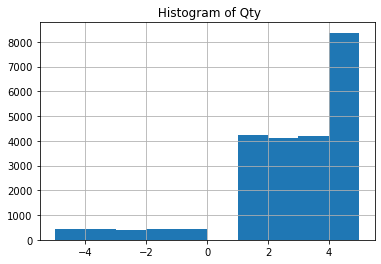

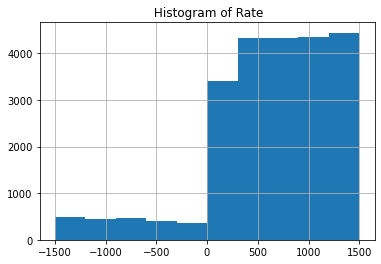

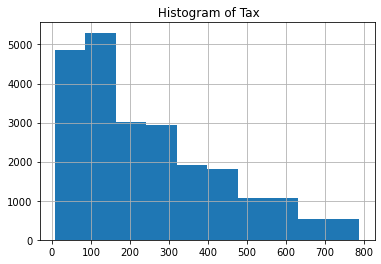

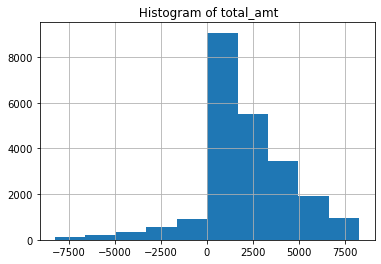

In [18]:
Customer_final[['Qty','Rate','Tax','total_amt']].apply( func )
plt.show()

In [19]:
# Barplots of categorical variables
def func1(x):
    plt.title( ' Barplot of ' + x.name )
    x.value_counts().plot(kind = "bar")
    plt.show()

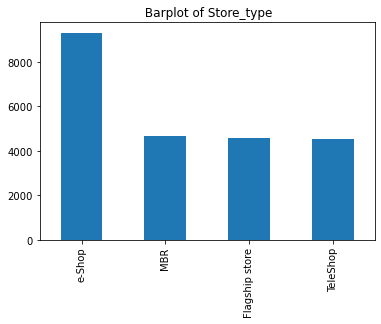

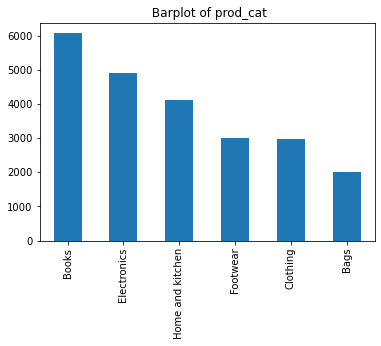

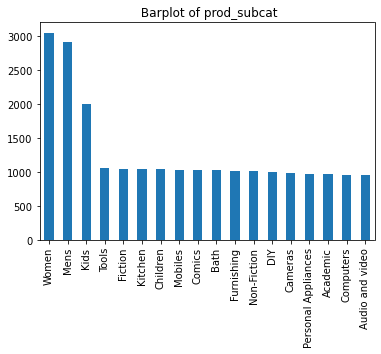

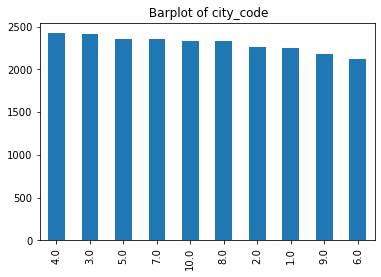

In [20]:
Customer_final[['Store_type','prod_cat','prod_subcat','city_code']].apply( func1 )
plt.show()

In [21]:
Customer_final.tran_date

0        28-02-2014
1        20-02-2014
2        15-02-2014
3        14-02-2014
4         12/2/2014
            ...    
23035      1/2/2011
23036      1/2/2011
23037    31-01-2011
23038    30-01-2011
23039    26-01-2011
Name: tran_date, Length: 23040, dtype: object

In [22]:
# Coverting transaction date variable to datetime object and formatting it
td=[]
for i in Customer_final.tran_date.index:
    if Customer_final.tran_date[i].find("/") == -1:
        td.append(dt.datetime.strptime( Customer_final.tran_date[i], '%d-%m-%Y' ).strftime("%Y-%m-%d"))
    elif Customer_final.tran_date[i].find("/") != -1:
        td.append(dt.datetime.strptime( Customer_final.tran_date[i], '%d/%m/%Y' ).strftime("%Y-%m-%d"))
td  

['2014-02-28',
 '2014-02-20',
 '2014-02-15',
 '2014-02-14',
 '2014-02-12',
 '2014-02-08',
 '2014-02-07',
 '2014-02-05',
 '2014-02-05',
 '2014-02-03',
 '2014-02-02',
 '2014-02-02',
 '2014-02-01',
 '2014-01-31',
 '2014-01-29',
 '2014-01-29',
 '2014-01-29',
 '2014-01-28',
 '2014-01-28',
 '2014-01-27',
 '2014-01-27',
 '2014-01-26',
 '2014-01-26',
 '2014-01-25',
 '2014-01-21',
 '2014-01-20',
 '2014-01-19',
 '2014-01-19',
 '2014-01-17',
 '2014-01-15',
 '2014-01-15',
 '2014-01-15',
 '2014-01-14',
 '2014-01-14',
 '2014-01-14',
 '2014-01-14',
 '2014-01-14',
 '2014-01-13',
 '2014-01-13',
 '2014-01-13',
 '2014-01-13',
 '2014-01-11',
 '2014-01-09',
 '2014-01-09',
 '2014-01-08',
 '2014-01-08',
 '2014-01-08',
 '2014-01-08',
 '2014-01-07',
 '2014-01-06',
 '2014-01-04',
 '2014-01-03',
 '2014-01-01',
 '2014-01-01',
 '2014-01-01',
 '2014-01-01',
 '2013-12-31',
 '2013-12-30',
 '2013-12-30',
 '2013-12-30',
 '2013-12-29',
 '2013-12-28',
 '2013-12-28',
 '2013-12-28',
 '2013-12-27',
 '2013-12-27',
 '2013-12-

In [23]:
# Calculating the time period for which the data is avialable
print(round(len(pd.date_range(pd.to_datetime(td).min(), pd.to_datetime(td).max(), freq = 'M'))/12,3),"years")

3.167 years


In [24]:
# Count of transactions with negative total amount
Customer_final[Customer_final.total_amt < 0].transaction_id.count()

2164

In [26]:
# Popular categories among female and male customers
pd.crosstab(Customer_final.Gender, Customer_final.prod_cat)

prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
Gender,,,,,,
F,993,2946,1439,2328,1528,1993
M,1004,3116,1518,2567,1467,2132


In [27]:
# City Code with maximum customers
Customer_final.city_code[Customer_final.city_code.value_counts().max()]

4.0

In [31]:
# Percentage of customers from that city
Customer_final[Customer_final['city_code'] == 4.0].cust_id.count() * 100 / Customer_final.cust_id.count()

10.512152777777779

In [32]:
Customer_final.groupby('Store_type')[['Qty', 'total_amt']].sum().astype(int)

,Qty,total_amt
Store_type,,
Flagship store,11142,9721596
MBR,11195,9674941
TeleShop,10993,9372133
e-Shop,22790,19842623


In [33]:
# Amount earned from electronics and clothing categories from flagship stores
Customer_final[(Customer_final.Store_type == "Flagship store") & (Customer_final.prod_cat.isin(['Electronics','Clothing']))].total_amt.sum()

3409559.27

In [34]:
# Amount earned from male customers under electronics category 
Customer_final[(Customer_final.Gender == "M") & (Customer_final.prod_cat == 'Electronics')]['total_amt'].sum()

5711351.62

In [35]:
# Count of customers having more than 10 unique transactions 
cf = Customer_final[Customer_final.total_amt >= 0].groupby('cust_id').transaction_id.count()

In [36]:
cf[cf > 10].count()

6

In [37]:
# Coverting DOB variable to datetime object and formatting it
dob=[]
for i in Customer_final.DOB.index:
    if Customer_final.DOB[i].find("/") == -1:
        dob.append(dt.datetime.strptime( Customer_final.DOB[i], '%d-%m-%Y' ).strftime("%Y-%m-%d"))
    elif Customer_final.DOB[i].find("/") != -1:
        dob.append(dt.datetime.strptime( Customer_final.DOB[i], '%d/%m/%Y' ).strftime("%Y-%m-%d"))
dob

['1981-09-26',
 '1981-09-26',
 '1987-10-24',
 '1992-02-03',
 '1971-12-11',
 '1990-03-19',
 '1983-05-22',
 '1990-02-07',
 '1990-06-21',
 '1990-06-21',
 '1984-03-19',
 '1979-04-05',
 '1978-08-14',
 '1990-12-09',
 '1990-03-19',
 '1973-06-02',
 '1988-12-07',
 '1980-12-20',
 '1973-06-02',
 '1972-11-10',
 '1984-03-07',
 '1990-09-18',
 '1977-05-28',
 '1992-01-21',
 '1975-02-11',
 '1986-10-25',
 '1988-02-22',
 '1990-07-04',
 '1987-07-11',
 '1985-03-12',
 '1986-11-10',
 '1985-05-23',
 '1992-09-11',
 '1975-08-27',
 '1988-02-22',
 '1971-07-15',
 '1979-08-03',
 '1975-12-23',
 '1976-02-21',
 '1992-12-09',
 '1978-10-05',
 '1979-08-03',
 '1985-02-21',
 '1980-05-05',
 '1983-02-23',
 '1988-01-17',
 '1981-09-01',
 '1979-07-27',
 '1975-04-15',
 '1978-09-13',
 '1970-03-14',
 '1991-03-02',
 '1991-05-29',
 '1977-06-28',
 '1977-04-27',
 '1992-03-28',
 '1980-04-25',
 '1971-06-14',
 '1980-12-28',
 '1976-01-05',
 '1991-05-29',
 '1971-05-10',
 '1970-03-14',
 '1981-12-13',
 '1979-08-22',
 '1975-10-12',
 '1970-06-

In [38]:
# Adding variable age to the dataset
Customer_final['age'] = pd.Series(pd.to_datetime("2014-03-01").year - pd.to_datetime(dob).year)

In [39]:
# Total amount spent on electronics and books categories by people aged between 25 and 35
Summ = Customer_final[(Customer_final['age'].between(25, 35, inclusive = "both")) & (Customer_final.prod_cat.isin(["Electronics","Books"]))]

In [40]:
Summ.total_amt.sum()

11373148.41

In [41]:
# Amount spent by these customers from 1st Jan, 2014 till 1st Mar, 2014
Customer_final.tran_date = td

In [42]:
Customer_final[(Customer_final.tran_date.between("2014-01-01", "2014-02-28", inclusive = "both")) & (Customer_final['age'].between(25, 35, inclusive = "both"))].total_amt.sum()

1106716.065